### Spam Detection using Text Mining and Naive Bayes Classifier

- Each SMS message can be a spam or a ham (legitimate).

In [1]:
# Import useful libararies used for data management
import pandas as pd
import numpy as np

# load dataset 'Spam.csv', using 'python' as engine
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
dataset = pd.read_csv('Spam.csv')

In [2]:
dataset.head()

,Text,Class
0,Hi...I have to use R to find out the 90% confi...,ham
1,"Francesco Poli wrote:) On Sun, 15 Apr 2007 21:...",ham
2,Stephen Thorne wrote:) What I was thinking was...,ham
3,"Hi,I have this site that auto generates an ind...",ham
4,Author: metzeDate: 2007-04-16 08:20:13 +0000 (...,ham


In [3]:
dataset['Class'].value_counts()
# Know the class prier and set out bench mark ie the prediction result should be greter than the number here

ham     4864
spam    3246
Name: Class, dtype: int64

In [4]:
# convert the 'label' column into a numeric variable; 'ham' as 0, 'spam' as 1

dataset['Label'] = dataset['Class'].map({'ham':0, 'spam':1})

In [5]:
dataset.head()

,Text,Class,Label
0,Hi...I have to use R to find out the 90% confi...,ham,0
1,"Francesco Poli wrote:) On Sun, 15 Apr 2007 21:...",ham,0
2,Stephen Thorne wrote:) What I was thinking was...,ham,0
3,"Hi,I have this site that auto generates an ind...",ham,0
4,Author: metzeDate: 2007-04-16 08:20:13 +0000 (...,ham,0


In [6]:
# Now let's define X and y 

X = dataset['Text']
y = dataset['Label']

In [7]:
# show the dimension of the X
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html
X.shape

(8110,)

In [8]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Now we are ready to vectorize the data
# first, instantiate the vectorizer
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# When building the vocabulary ignore terms that have a document frequency strictly lower than the min_df (proportion), or higher than max_df
vectorizer = CountVectorizer(encoding='utf-8',stop_words='english',min_df=0.02, max_df=0.5)

In [9]:
vectorizer

CountVectorizer(max_df=0.5, min_df=0.02, stop_words='english')

In [10]:
# Learn the vocabulary dictionary and return term-document matrix.
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.fit_transform
X_vec = vectorizer.fit_transform(X)

In [11]:
# print the terms
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.get_feature_names
print(vectorizer.get_feature_names())

['00', '000', '0000', '00our', '00proposition', '00we', '01', '02', '0200', '03', '04', '05', '06', '07', '08', '09', '0nline', '10', '100', '11', '12', '128', '129', '13', '14', '149', '149ableton', '15', '16', '17', '18', '185technologies', '19', '1imited', '1o', '20', '2006', '2007', '21', '22', '23', '24', '2441', '2442', '2480', '25', '26', '27', '28', '29', '2http', '30', '31', '319', '32', '33', '35', '36', '369', '37', '38', '39', '399', '40', '40speedy', '41', '425', '44', '449', '45', '47', '49', '49adobe', '49http', '50', '500', '59', '60', '69adobe', '75', '79', '80', '819', '89', '899', '90', '95', '95you', '95your', '99', '______________________________________________', '______________________________________________r', 'able', 'ac', 'access', 'account', 'accurate', 'acrobat', 'action', 'actually', 'add', 'added', 'additional', 'address', 'adobe', 'advance', 'advancedsolution', 'advertisement', 'advisor', 'affiliates', 'alert', 'alerttmxotrimax', 'allow', 'alternative', 

In [12]:
len(vectorizer.get_feature_names())

760

In [33]:
# get the count of each terms in each document
print(X_vec.toarray())

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [34]:
print(X_vec)

  (0, 320)	1
  (0, 704)	1
  (0, 85)	1
  (0, 283)	1
  (0, 666)	2
  (0, 487)	1
  (0, 35)	2
  (0, 442)	3
  (0, 445)	1
  (0, 459)	1
  (0, 560)	1
  (0, 612)	1
  (0, 180)	1
  (0, 450)	1
  (0, 316)	4
  (0, 722)	1
  (0, 427)	1
  (0, 196)	1
  (0, 752)	2
  (0, 177)	2
  (0, 326)	2
  (0, 402)	2
  (0, 379)	1
  (0, 122)	1
  (0, 91)	1
  :	:
  (8109, 128)	1
  (8109, 50)	1
  (8109, 511)	1
  (8109, 78)	1
  (8109, 72)	2
  (8109, 26)	1
  (8109, 496)	1
  (8109, 73)	1
  (8109, 658)	1
  (8109, 657)	1
  (8109, 694)	1
  (8109, 4)	1
  (8109, 88)	2
  (8109, 44)	1
  (8109, 656)	1
  (8109, 246)	1
  (8109, 84)	1
  (8109, 3)	1
  (8109, 87)	1
  (8109, 43)	1
  (8109, 654)	1
  (8109, 527)	1
  (8109, 5)	1
  (8109, 58)	1
  (8109, 42)	1


In [15]:
# Now let's import cross validation
from sklearn.model_selection import cross_val_score,cross_val_predict

In [16]:
#Import Multinomial Naive Bayes model from sklearn
from sklearn.naive_bayes import MultinomialNB

# Create a Multinomial Naive Bayes Classifier, which is frequently used in Tf-idf
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
mnb = MultinomialNB()

In [17]:
# Make class prediction for test set
# y_pred_class is the binary label
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.predict
score = cross_val_score(mnb,X_vec,y,cv=10)


In [18]:
score.mean()

0.9326757090012331

In [19]:
# import libararies for evaluation measures
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [20]:
# get predicted class for y
y_pred_class = cross_val_predict(mnb,X_vec,y,cv=10)

In [21]:
y_pred_class

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [21]:
print("Confusion Matrix:", "\n", confusion_matrix(y, y_pred_class))
print("Classification Report:","\n", classification_report(y, y_pred_class))

Confusion Matrix: 
 [[4822   42]
 [ 504 2742]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      4864
           1       0.98      0.84      0.91      3246

    accuracy                           0.93      8110
   macro avg       0.95      0.92      0.93      8110
weighted avg       0.94      0.93      0.93      8110



In [22]:
# y_pred_prob is the probability estimate
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.predict_proba
y_pred_prob = cross_val_predict(mnb,X_vec,y,cv=10, method ='predict_proba')

In [24]:
y_pred_prob

array([[1.00000000e+000, 1.44071416e-065],
       [1.00000000e+000, 1.11410429e-041],
       [9.99999282e-001, 7.17970080e-007],
       ...,
       [4.04859657e-273, 1.00000000e+000],
       [2.18793793e-002, 9.78120621e-001],
       [4.04859657e-273, 1.00000000e+000]])

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# y_test is the true label, pred_prob[:,1] measures the predicted probability of belonging to class 1 (which is defined as positive class)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
fpr, tpr, thresholds = roc_curve(y, y_pred_prob[:,1], pos_label=1)


In [24]:
# Aread under ROC curve
roc_auc=auc(fpr,tpr)
roc_auc

0.9922698381814056

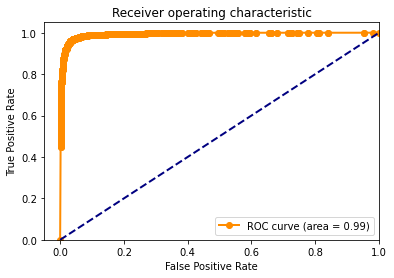

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
lw = 2
plt.plot(fpr, tpr, marker='o',color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [28]:
# Now let's see the false positive messages
X[(y == 0) & (y_pred_class==1)]

65      -- One person has been killed and one wounded ...
93      -- At least 20 people were fatally shot Monday...
117     -- The death toll in the Virgina Tech campus s...
136     April 16, 2007Salem, MassachusettsBy Mike Cint...
157     April 9, 2007Salem, MassachusettsBy Paul Goodw...
276     -- The gunman in Monday's Virginia Tech campus...
319     Hello sm1lies,The total prize pool for the Onl...
335     At 2 p.m. ET Katie Couric will anchor live cov...
351     WATCH LIVE STREAMING VIDEO OF ONGOING VIRGINIA...
432     Hello sm1lies,We thought you may like to know ...
548     -- Bombings in Baghdad kill 127 people, includ...
567     -- U.S. Supreme Court in a 5-4 ruling upholds ...
796     "Chas Owens" schreef:) foreach is dead, long l...
956     April 19, 2007Salem, MassachusettsBy Timothy L...
995     -- The jury in the trial of Mary Winkler finds...
1296    Hello sm1lies,This is your last day to registe...
1326    Hello sm1lies,A new Assembly Contest is now op...
1390    April 

In [29]:
# train the model using all training set 
mnb.fit(X_vec, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#### TODO
- Please try TfidfVectorizer later to see the model performance (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
- You need to use "from sklearn.feature_extraction.text import TfidfVectorizer" to import the TfidfVectorizer first